In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_char = pd.read_csv(r"C:\Users\Subrata chatterjee\Desktop\Projects\Car-accident-severity\Data\caracteristics.csv", encoding='latin-1', low_memory=False)
df_pl = pd.read_csv(r"C:\Users\Subrata chatterjee\Desktop\Projects\Car-accident-severity\Data\places.csv")
df_users = pd.read_csv(r"C:\Users\Subrata chatterjee\Desktop\Projects\Car-accident-severity\Data\users.csv")
df_veh = pd.read_csv(r"C:\Users\Subrata chatterjee\Desktop\Projects\Car-accident-severity\Data\vehicles.csv")
df_holi = pd.read_csv(r"C:\Users\Subrata chatterjee\Desktop\Projects\Car-accident-severity\Data\holidays.csv")

In [3]:
df_holi.head()

,ds,holiday
0,2005-01-01,New year
1,2005-03-28,Easter Monday
2,2005-05-01,Labour Day
3,2005-05-05,Ascension Thursday
4,2005-05-08,Victory in Europe Day


In [4]:
# dropping unrelevant columns.

df_char.drop(['adr','com', 'gps'], axis=1, inplace=True)
df_pl.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
df_veh.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(df_char.shape, df_pl.shape, df_veh.shape, df_users.shape)
df_pl

(839985, 13) (839985, 12) (1433389, 2) (1876005, 12)


,Num_Acc,catr,voie,circ,nbv,vosp,prof,plan,surf,infra,situ,env1
0,201600000001,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
5,201600000006,3.0,41,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
6,201600000007,3.0,1,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
7,201600000008,3.0,2,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
8,201600000009,4.0,0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,99.0
9,201600000010,4.0,0,2.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,0.0


In [5]:
df_char.columns = ['ID', 'year', 'month', 'day', 'time', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'dep']
df_pl.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df = df_char.merge(df_pl, how='inner',on='ID')
df.head(5)

,ID,year,month,day,time,lum,agg,int,atm,col,...,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


In [6]:
categories = df_veh['catv'].value_counts().sort_index()
print(categories.shape)
categories

(33,)


1      58128
2      79884
3       5008
4       7463
5      21816
6         39
7     890217
8        120
9        300
10     70205
11        17
12        79
13      5295
14     15392
15     11782
16       657
17     11501
18      2075
19       183
20      1383
21      2762
30     59918
31     28038
32     29596
33     97185
34     13436
35       367
36      1624
37      9071
38      2524
39       328
40      1555
99      5441
Name: catv, dtype: int64

In [7]:
df_users = pd.read_csv(r"C:\Users\Subrata chatterjee\Desktop\Projects\Car-accident-severity\Data\users.csv")
df_users.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [8]:
df_users.drop(['place', 'sexe', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], axis=1, inplace=True)
df_users.columns = ['ID', 'catu', 'grav', 'secu', 'year_birth']
df_users.sort_values(by='ID').head(10)

,ID,catu,grav,secu,year_birth
1678507,200500000001,1,4,11.0,1976.0
1678512,200500000001,2,1,11.0,1991.0
1678511,200500000001,2,1,11.0,1998.0
1678508,200500000001,1,3,11.0,1968.0
1678509,200500000001,2,1,11.0,1964.0
1678510,200500000001,2,1,31.0,2004.0
1678514,200500000002,1,3,21.0,1979.0
1678513,200500000002,1,1,11.0,1955.0
1678516,200500000003,1,3,21.0,1956.0
1678515,200500000003,1,1,21.0,1983.0


In [9]:
#number of users

num_users = df_users.ID.value_counts().sort_index(ascending=True)
num_users

200500000001    6
200500000002    2
200500000003    2
200500000004    4
200500000005    2
200500000006    1
200500000007    2
200500000008    1
200500000009    3
200500000010    2
200500000011    4
200500000012    1
200500000013    1
200500000014    3
200500000015    1
200500000016    3
200500000017    2
200500000018    2
200500000019    2
200500000020    3
200500000021    2
200500000022    2
200500000023    2
200500000024    3
200500000025    2
200500000026    3
200500000027    3
200500000028    6
200500000029    3
200500000030    2
               ..
201600059403    1
201600059404    2
201600059405    3
201600059406    2
201600059407    2
201600059408    1
201600059409    2
201600059410    2
201600059411    1
201600059412    3
201600059413    1
201600059414    2
201600059415    2
201600059416    2
201600059417    1
201600059418    2
201600059419    1
201600059420    2
201600059421    2
201600059422    2
201600059423    2
201600059424    1
201600059425    1
201600059426    3
2016000594

In [10]:
#pedestrians

df_users['ped'] = df_users['catu'].apply(lambda x: 1 if x==3 else 0)
df_users.head(5)

,ID,catu,grav,secu,year_birth,ped
0,201600000001,1,1,11.0,1983.0,0
1,201600000001,1,3,21.0,2001.0,0
2,201600000002,1,3,11.0,1960.0,0
3,201600000002,2,3,11.0,2000.0,0
4,201600000002,2,3,11.0,1962.0,0


In [11]:
df_users2 = df_users.groupby('ID').sum()
ped = df_users2.ped
print('Accidents in which pedestrians have been involved:')
df_users2.ped.value_counts()

Accidents in which pedestrians have been involved:


0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
10         4
9          3
8          2
25         1
21         1
15         1
Name: ped, dtype: int64

In [12]:
# crical age

acc_year = df_users.ID.astype(str).str[:4] # year of the accident
age = acc_year.astype(int) - df_users['year_birth'] # age of the user
df_users['age']= age
df_users

,ID,catu,grav,secu,year_birth,ped,age
0,201600000001,1,1,11.0,1983.0,0,33.0
1,201600000001,1,3,21.0,2001.0,0,15.0
2,201600000002,1,3,11.0,1960.0,0,56.0
3,201600000002,2,3,11.0,2000.0,0,16.0
4,201600000002,2,3,11.0,1962.0,0,54.0
5,201600000003,1,1,11.0,1997.0,0,19.0
6,201600000003,3,3,NaN,1970.0,1,46.0
7,201600000004,1,3,23.0,1999.0,0,17.0
8,201600000004,2,4,23.0,1999.0,0,17.0
9,201600000004,1,1,11.0,1985.0,0,31.0


In [13]:
df2 = df_users[df_users['grav']==2]
deaths = df2['age'].value_counts()
deaths.sort_values(ascending=False)

total, suma, i = deaths.values.sum(), 0, 0

for num in deaths.values:
    suma += num
    per = (suma/total)*100
    if per<=50:
        i += 1
        percentage = per
print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(percentage,total,i))

A  49.96 percent of a total of 50487 deaths is found on the 25 first ages, being the deaths array sorted by number of deaths.


In [14]:
topdeaths = deaths.head(15)
print('Half of the deaths in a car accident are aged between % 2d and % 2.0i y.o.'
      % (topdeaths.index.min(), topdeaths.index.max()))
topdeaths

Half of the deaths in a car accident are aged between  17 and  31 y.o.


20.0    1630
21.0    1600
22.0    1582
19.0    1529
23.0    1401
24.0    1401
25.0    1289
18.0    1219
26.0    1177
27.0    1006
28.0     923
29.0     918
31.0     822
17.0     811
30.0     801
Name: age, dtype: int64

Text(0.5, 1.0, 'Total number of deahts by age from 2005 to 2016')

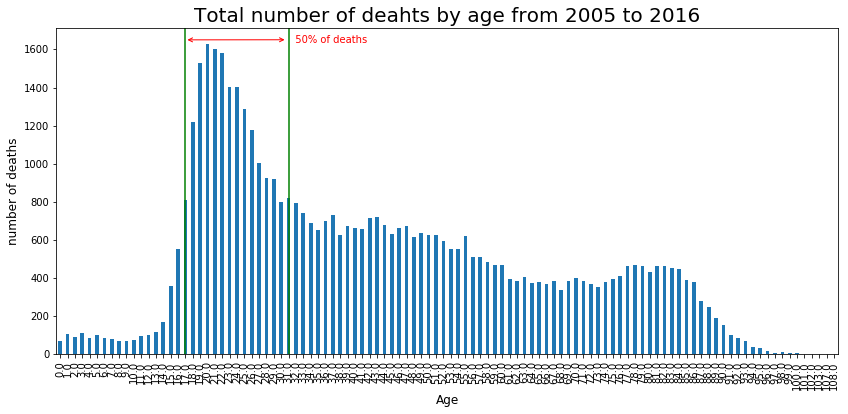

In [15]:
#Visualize the number of deaths by age

pd.DataFrame(deaths)
dplot=deaths.sort_index()
dplot.plot.bar(figsize=(14,6))

plt.annotate('  50% of deaths',
             color='r',
            xy=(17,1650),
            xytext=(31,1635),
            arrowprops=dict(arrowstyle='<->', color='r')
            )

plt.axvline(x=17, color='g', linestyle='-')
plt.axvline(x=31, color='g', linestyle='-')

plt.xlabel('Age', size=12)
plt.ylabel('number of deaths', size=12)
plt.title('Total number of deahts by age from 2005 to 2016', size=20)

People older than 84 are more likely to die with at least 1 out of 10 of the times, rising to beyond 35% in some cases.


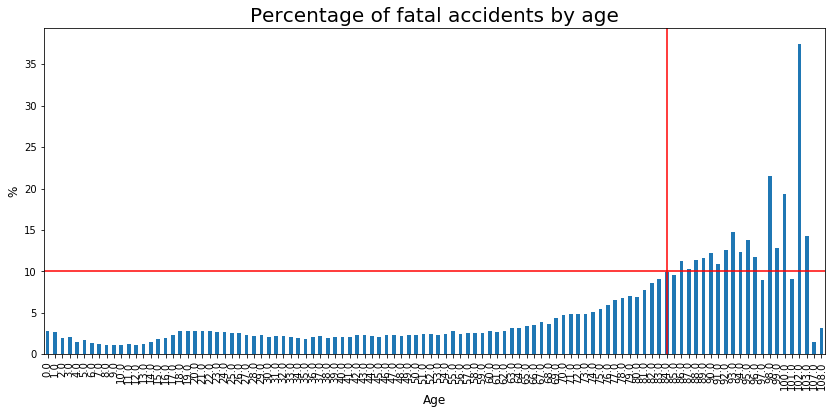

In [16]:

#dead age

death = df2['age'].value_counts().sort_index()
total = df_users['age'].value_counts().sort_index()
death_prop = (deaths/total)*100
d = death_prop.dropna()
minimum = d[d>9.9].index.min()
d.plot.bar(figsize=(14,6))
plt.title('Percentage of fatal accidents by age', size=20)
plt.xlabel('Age', size=12)
plt.ylabel('%', size=12)
plt.axhline(y=10, color='r')
plt.axvline(x=84, color='r')
print('People older than {0:2} are more likely to die\
 with at least 1 out of 10 of the times, rising to beyond 35% in some cases.'.format(int(minimum)))

In [17]:
df_users['crit_age'] = df_users['age'].apply(lambda x: 1 if 17<=x<=31 else 0)
df_users['dead_age'] = df_users['age'].apply(lambda x: 1 if x>84 else 0)

df_users.head(5)

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age
0,201600000001,1,1,11.0,1983.0,0,33.0,0,0
1,201600000001,1,3,21.0,2001.0,0,15.0,0,0
2,201600000002,1,3,11.0,1960.0,0,56.0,0,0
3,201600000002,2,3,11.0,2000.0,0,16.0,0,0
4,201600000002,2,3,11.0,1962.0,0,54.0,0,0


In [18]:
df2 = df_users.groupby('ID').sum().sort_index(ascending=True)
df2['crit_age1'] = df2['crit_age'].apply(lambda x: 1 if x>0 else 0)
df2['dead_age1'] = df2['dead_age'].apply(lambda x: 1 if x>0 else 0)
df2['ped1'] = df2['ped'].apply(lambda x: 1 if x>0 else 0)
df2['num_us'] = num_users
df2

,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us
ID,,,,,,,,,,,,
200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6
200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2
200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2
200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4
200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2
200500000006,1,2,11.0,1951.0,0,54.0,0,0,0,0,0,1
200500000007,2,5,22.0,3948.0,0,62.0,1,0,1,0,0,2
200500000008,1,3,11.0,1978.0,0,27.0,1,0,1,0,0,1
200500000009,4,11,33.0,5817.0,0,198.0,0,0,0,0,0,3


In [19]:
def change_grav(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = df_users[['ID', 'grav']].copy()
df3['grav'] = df_users['grav'].apply(change_grav)
df3.sort_values(by='ID')

,ID,grav
1678507,200500000001,0
1678512,200500000001,0
1678511,200500000001,0
1678508,200500000001,1
1678509,200500000001,0
1678510,200500000001,0
1678514,200500000002,1
1678513,200500000002,0
1678516,200500000003,1
1678515,200500000003,0


In [20]:
severity = df3[['grav', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,grav
ID,
200500000001,1
200500000002,1
200500000003,1
200500000004,1
200500000005,1
200500000006,1
200500000007,0
200500000008,1
200500000009,1


In [21]:
df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us,sev
0,200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6,1
1,200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2,1
2,200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2,1
3,200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4,1
4,200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2,1
5,200500000006,1,2,11.0,1951.0,0,54.0,0,0,0,0,0,1,1
6,200500000007,2,5,22.0,3948.0,0,62.0,1,0,1,0,0,2,0
7,200500000008,1,3,11.0,1978.0,0,27.0,1,0,1,0,0,1,1
8,200500000009,4,11,33.0,5817.0,0,198.0,0,0,0,0,0,3,1
9,200500000010,4,4,11.0,3912.0,1,98.0,0,0,0,0,1,2,1


In [22]:
print('Both data frames having same number of rows is an indicator that any accident has been left behind')
df.shape, df2.shape

Both data frames having same number of rows is an indicator that any accident has been left behind


((839985, 24), (839985, 14))

In [23]:
df = df.merge(df2[['ID','crit_age1', 'ped1','dead_age1', 'num_us', 'sev']], on='ID', how='left')
df

,ID,year,month,day,time,lum,agg,int,atm,col,...,shape,surf,infra,situation,school,crit_age1,ped1,dead_age1,num_us,sev
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1
5,201600000006,16,12,23,1115,1,2,1,7.0,6.0,...,1.0,1.0,0.0,1.0,99.0,0,1,0,2,1
6,201600000007,16,5,1,1145,1,2,1,7.0,2.0,...,1.0,1.0,0.0,1.0,99.0,0,0,0,3,0
7,201600000008,16,5,14,1915,2,1,1,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0,0,0,3,1
8,201600000009,16,9,23,1900,1,2,1,1.0,3.0,...,0.0,1.0,0.0,1.0,99.0,0,0,0,2,1
9,201600000010,16,12,30,1030,1,1,1,9.0,6.0,...,1.0,7.0,0.0,1.0,0.0,0,1,0,2,1


In [24]:
from datetime import datetime 

dt = df[['ID','year', 'month', 'day', 'time' ]]
#weekday
date = (dt.year+2000)*10000+dt.month*100+dt.day
dt['date'] = pd.to_datetime(date, format='%Y%m%d')
dt['weekday'] = dt['date'].dt.weekday #weekday functin from datetime gives a number to each day of the week from 0 to 6.

#weekend
dt['weekend'] = dt['weekday'].apply(lambda x: 1 if x>4 else 0)

#night
# dt['night'] = dt['hhmm'].apply(lambda x: 1 if 700>x or x>2100 else 0) 

#holiday
dt.loc[dt.date.isin(df_holi.ds) , 'holiday'] = 1
dt.holiday.fillna(0, inplace=True)
dt.head(5)

,ID,year,month,day,time,date,weekday,weekend,holiday
0,201600000001,16,2,1,1445,2016-02-01,0,0,0.0
1,201600000002,16,3,16,1800,2016-03-16,2,0,0.0
2,201600000003,16,7,13,1900,2016-07-13,2,0,0.0
3,201600000004,16,8,15,1930,2016-08-15,0,0,1.0
4,201600000005,16,12,23,1100,2016-12-23,4,0,0.0


In [25]:
df = df.merge(dt[['ID', 'date', 'weekend', 'holiday']],on='ID', how='left')
df.drop(['year', 'month', 'day'], axis=1, inplace=True)
df.head()

,ID,time,lum,agg,int,atm,col,lat,long,dep,...,situation,school,crit_age1,ped1,dead_age1,num_us,sev,date,weekend,holiday
0,201600000001,1445,1,2,1,8.0,3.0,0.0,0,590,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,1800,1,2,6,1.0,6.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,1900,1,1,1,1.0,6.0,0.0,0,590,...,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,1930,2,2,1,7.0,3.0,0.0,0,590,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,1100,1,2,3,1.0,3.0,0.0,0,590,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0


In [26]:
df['time'] = df.time.div(100).apply(np.floor)

In [27]:
df.rename(columns={'crit_age1':'crit_age','dead_age1':'dead_age', 'ped1':'ped'},inplace=True)
df.to_csv('Final_Data.csv')

In [28]:
df = pd.read_csv(r"C:\Users\Subrata chatterjee\Desktop\Projects\Car-accident-severity\Final_Data.csv", index_col=0)
df.head(10)

,ID,time,lum,agg,int,atm,col,lat,long,dep,...,situation,school,crit_age,ped,dead_age,num_us,sev,date,weekend,holiday
0,201600000001,14.0,1,2,1,8.0,3.0,0.0,0,590,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,18.0,1,2,6,1.0,6.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,19.0,1,1,1,1.0,6.0,0.0,0,590,...,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,19.0,2,2,1,7.0,3.0,0.0,0,590,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,11.0,1,2,3,1.0,3.0,0.0,0,590,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0
5,201600000006,11.0,1,2,1,7.0,6.0,0.0,0,590,...,1.0,99.0,0,1,0,2,1,2016-12-23,0,0.0
6,201600000007,11.0,1,2,1,7.0,2.0,0.0,0,590,...,1.0,99.0,0,0,0,3,0,2016-05-01,1,1.0
7,201600000008,19.0,2,1,1,1.0,1.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-05-14,1,0.0
8,201600000009,19.0,1,2,1,1.0,3.0,0.0,0,590,...,1.0,99.0,0,0,0,2,1,2016-09-23,0,0.0
9,201600000010,10.0,1,1,1,9.0,6.0,0.0,0,590,...,1.0,0.0,0,1,0,2,1,2016-12-30,0,0.0


In [29]:
df.drop(['lat', 'long', 'road_num'], axis=1, inplace=True)

In [30]:
print('Missing values in atm:', df["atm"].isna().sum(),'\n'
    'Missing values in collision:', df["col"].isna().sum(), '\n'
    'Missing values in road_cat:', df["road_cat"].isna().sum(),'\n'
    'Missing values in surf:', df["surf"].isna().sum())

Missing values in atm: 55 
Missing values in collision: 11 
Missing values in road_cat: 1 
Missing values in surf: 1017


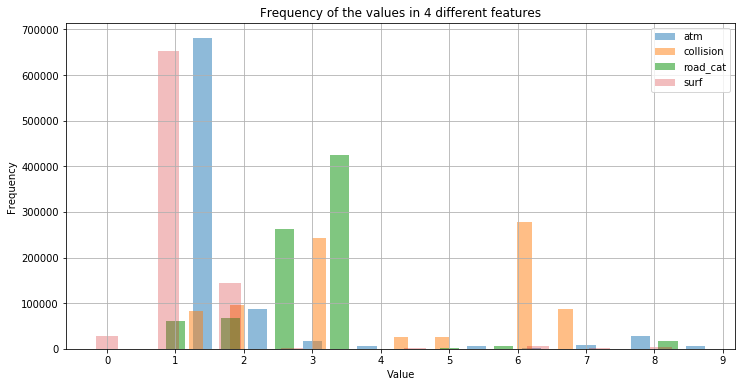

In [31]:
df['atm'].hist(alpha=0.5, rwidth=0.35, align='mid', figsize=(12,6), label='atm')
df['col'].hist(alpha=0.5, rwidth=0.35, align='mid', label='collision')
df['road_cat'].hist(alpha=0.6, rwidth=0.35, align='left', label='road_cat')
df['surf'].hist(alpha=0.3,rwidth=0.35, align='left', label='surf')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

In [32]:
df['atm'].fillna(9, inplace=True)
df['col'].fillna(6, inplace=True)
df['road_cat'].fillna(9, inplace=True)
df['surf'].fillna(9, inplace=True)
df['surf'].replace(0,9, inplace=True)
df.surf.value_counts()

1.0    652322
2.0    143254
9.0     32498
7.0      5474
5.0      2643
8.0      2159
3.0       861
6.0       466
4.0       308
Name: surf, dtype: int64

In [33]:
df.drop(['infra', 'res_lane'], axis=1, inplace=True)

In [34]:
df['num_lanes'].value_counts()

2.0     464716
0.0     102796
1.0     101345
4.0      76934
3.0      66252
6.0      13945
5.0       7839
8.0       2332
7.0        840
10.0       407
20.0       241
50.0       158
9.0        148
11.0        32
12.0        32
40.0        30
30.0        27
13.0        15
25.0        14
21.0        11
26.0         9
15.0         8
90.0         7
14.0         6
24.0         6
70.0         5
22.0         5
31.0         3
60.0         3
17.0         2
16.0         2
53.0         2
27.0         2
45.0         2
41.0         1
44.0         1
33.0         1
29.0         1
52.0         1
39.0         1
28.0         1
36.0         1
62.0         1
42.0         1
76.0         1
65.0         1
84.0         1
23.0         1
91.0         1
54.0         1
18.0         1
86.0         1
99.0         1
Name: num_lanes, dtype: int64

In [35]:
df.num_lanes.fillna(0, inplace=True)
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2 if x>6 or x==0 else x)
df.num_lanes.value_counts()

2.0    573670
1.0    101345
4.0     76934
3.0     66252
6.0     13945
5.0      7839
Name: num_lanes, dtype: int64

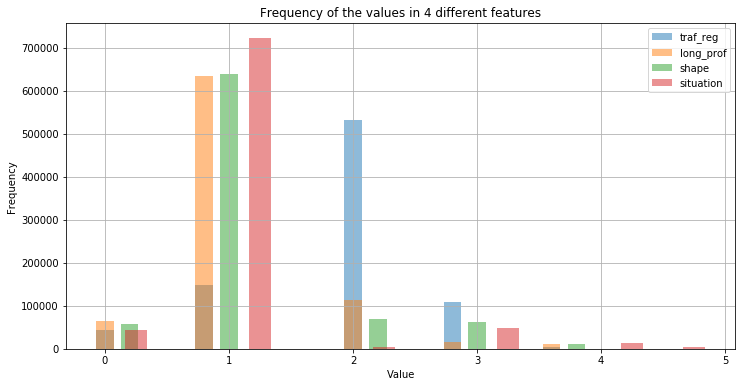

In [36]:
df['traf_reg'].hist(alpha=0.5, rwidth=0.35, align='left', figsize=(12,6), label='traf_reg')
df['long_prof'].hist(alpha=0.5,rwidth=0.35, align='left', label='long_prof')
df['shape'].hist(alpha=0.5,rwidth=0.35, align='mid', label='shape')
df['situation'].hist(alpha=0.5,rwidth=0.35, align='mid', label='situation')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(6))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

In [37]:
df['traf_reg'].fillna(0, inplace=True)
df['traf_reg'] = df['traf_reg'].replace(0,2)

df['long_prof'].fillna(0, inplace=True)
df['long_prof'] = df['long_prof'].replace(0,1)

df['shape'].fillna(0, inplace=True)
df['shape'] = df['shape'].replace(0,1)

df['situation'].fillna(0, inplace=True)
df['situation'] = df['situation'].replace(0,1)

Text(0.5, 1.0, 'School feature values')

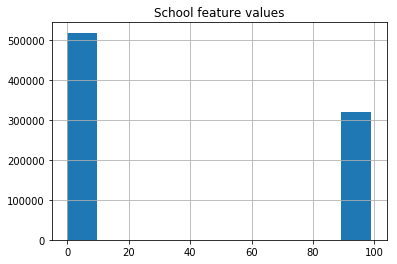

In [38]:
df.school.describe(), df.school.hist()
plt.title('School feature values')

In [39]:

df.school.fillna(0, inplace=True)
df['school'] = df.school.apply(lambda x:1 if x>0 else 0)

In [40]:
df["dep"] = df["dep"].div(10).apply(np.floor)
df["dep"] = df["dep"].astype(int)

Accidents classified in each level of severity:
0    471695
1    368290
Name: sev, dtype: int64


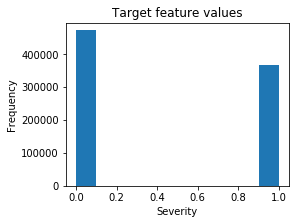

In [41]:
df.sev.plot.hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df.sev.value_counts())

In [42]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
date = df[['ID','sev', 'date']]
date.date

0        2016-02-01
1        2016-03-16
2        2016-07-13
3        2016-08-15
4        2016-12-23
5        2016-12-23
6        2016-05-01
7        2016-05-14
8        2016-09-23
9        2016-12-30
10       2016-01-25
11       2016-01-28
12       2016-02-05
13       2016-04-17
14       2016-08-17
15       2016-09-08
16       2016-11-08
17       2016-11-28
18       2016-05-06
19       2016-09-05
20       2016-10-14
21       2016-04-02
22       2016-11-07
23       2016-11-12
24       2016-12-04
25       2016-12-06
26       2016-12-15
27       2016-12-09
28       2016-12-28
29       2016-05-06
            ...    
839955   2005-12-14
839956   2005-12-03
839957   2005-12-05
839958   2005-12-09
839959   2005-12-13
839960   2005-12-13
839961   2005-12-15
839962   2005-12-23
839963   2005-12-02
839964   2005-12-16
839965   2005-12-16
839966   2005-12-17
839967   2005-12-22
839968   2005-12-29
839969   2005-12-04
839970   2005-12-11
839971   2005-12-01
839972   2005-12-01
839973   2005-12-03


AttributeError: 'DataFrame' object has no attribute 'datetime'

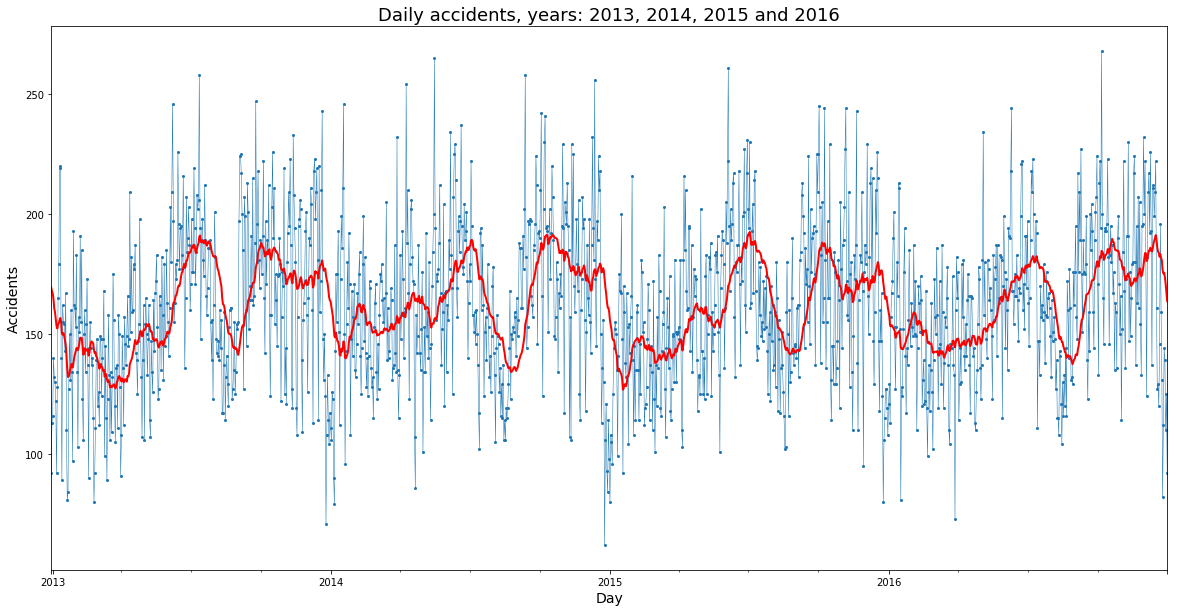

In [43]:

#Seasonality


date['year'] = df.date.dt.year
date['month'] = df.date.dt.month
date['weekday'] = df.date.dt.weekday
high_sev = date[date['sev']==1]

season = date[['date', 'ID']].groupby('date').count()
season['rolling'] = season.ID.rolling(window=30).mean()
season['ID'][365*8:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*8:].plot(color='r', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, years: 2013, 2014, 2015 and 2016', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

t0 = dt.datetime.strptime('2012-12-15', '%Y-%m-%d')
t1 = dt.datetime.strptime('2017-01-15', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

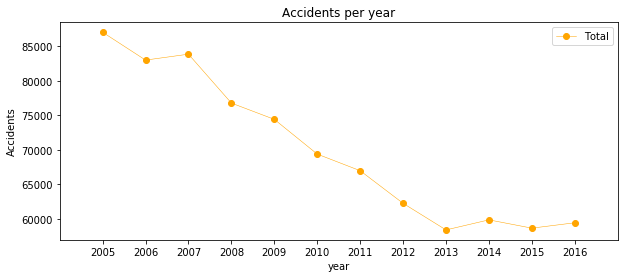

In [44]:
#By year

yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2005,2017))
plt.xlim(2004,2017)
plt.ylabel('Accidents')
plt.legend()

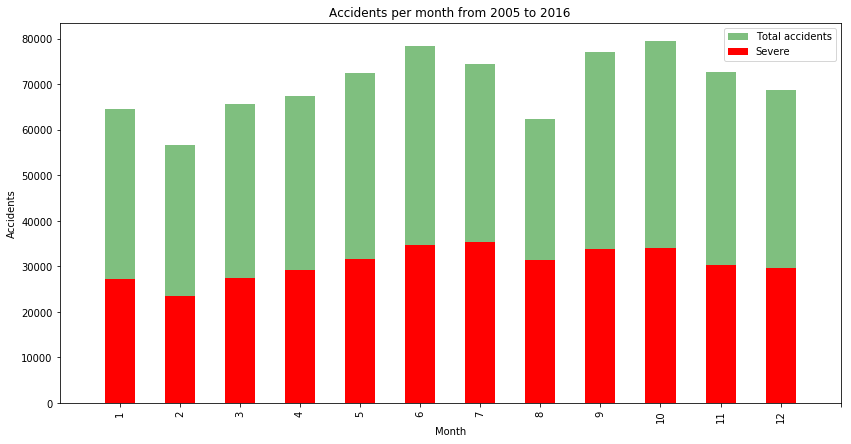

In [45]:
#By month

monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(14,7), alpha=0.5, color='g', label='Total accidents')
monthly['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per month from 2005 to 2016')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

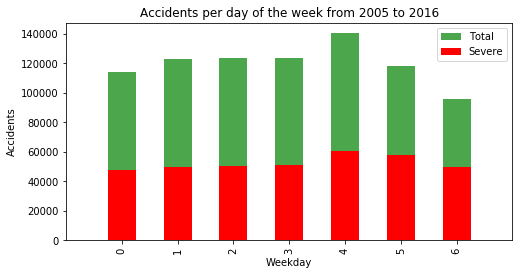

In [46]:
#By day of the week

weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(8,4), alpha=0.7, color='g', label='Total')
weekday['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per day of the week from 2005 to 2016')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

839985

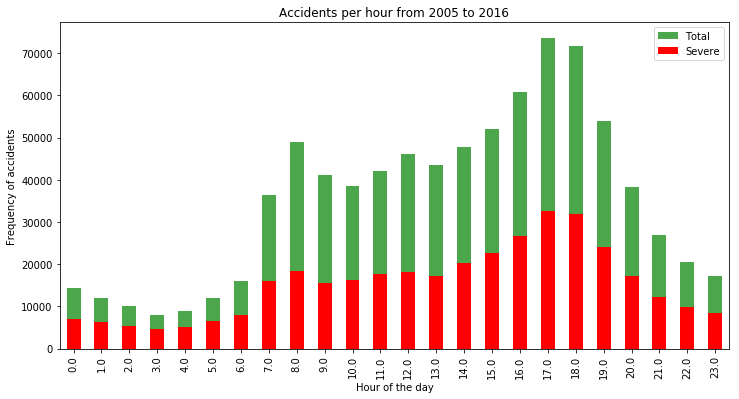

In [47]:
#By hour of the day

hourly = df[['ID', 'time']].groupby('time').count()
hourly['high_sev'] = df[df.sev==1][['ID', 'time']].groupby('time').count()
hourly['ID'].plot.bar(figsize=(12,6), alpha=0.7, color='g', label='Total')
hourly['high_sev'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()
# df.time.value_counts()
# hourly.ID.value_counts()
hourly['ID'].sum()

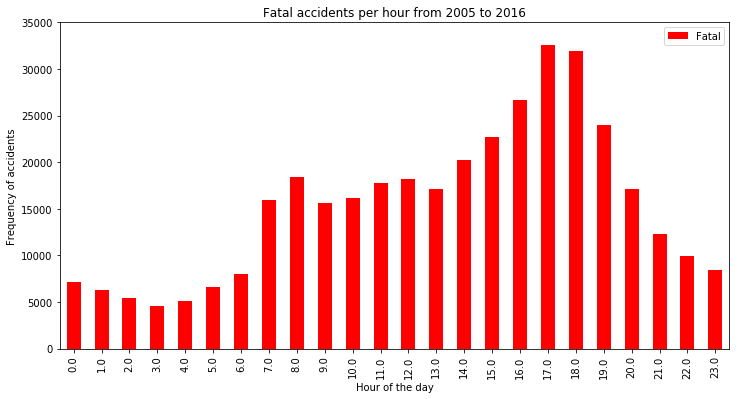

In [48]:
#Zoom in fatal accidents by hour of the day

hourly['high_sev'].plot.bar(figsize=(12,6),color='r', label='Fatal')
plt.xticks(range(24))
plt.ylim((0,35000))
plt.title('Fatal accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()

In [49]:
noon_morn_severe = hourly.high_sev.loc[0:6].sum()+hourly.high_sev.loc[21:23].sum()
day_severe = hourly.high_sev.loc[7:20].sum()
noon_morn = hourly.ID.loc[0:6].sum()+hourly.ID.loc[21:23].sum()
day = hourly.ID.loc[7:20].sum()
noon_morn_prop = (noon_morn_severe/noon_morn)*100
day_prop = (day_severe/day)*100
print('The percentage of severe accidents from 9pm to 6am is {0:0.2f}% of the total amount of accidents ocurring between this hours,\
     while the percentage of deathly accidents from 7am to 8pm is {1:2.2f}%.'.format(noon_morn_prop.round(2), day_prop))

The percentage of severe accidents from 9pm to 6am is 50.67% of the total amount of accidents ocurring between this hours,     while the percentage of deathly accidents from 7am to 8pm is 42.41%.


In [50]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [51]:
df.day.value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1         16
2         13
3         15
4         23
5         23
6          1
7         14
8         23
9         30
10        25
11        28
12         5
13        17
14        17
15         8
16         8
17        28
18         6
19         5
20        14
21         2
22         7
23        12
24         4
25         6
26        15
27         9
28        28
29         6
          ..
839955    14
839956     3
839957     5
839958     9
839959    13
839960    13
839961    15
839962    23
839963     2
839964    16
839965    16
839966    17
839967    22
839968    29
839969     4
839970    11
839971     1
839972     1
839973     3
839974     9
839975    12
839976    15
839977    16
839978    16
839979    20
839980    21
839981    23
839982    26
839983    27
839984    31
Name: day, Length: 839985, dtype: int64>

In [52]:
df[['sev','lum', 'agg', 'int', 'atm',
    'col', 'dep', 'road_cat', 'traf_reg',
    'num_lanes', 'long_prof', 'shape', 'surf', 
    'situation', 'school', 'crit_age','dead_age', 'ped',
    'num_us', 'weekend', 'holiday', 'month', 'day']].corr()['sev'].sort_values(ascending=False)

sev          1.000000
shape        0.144514
situation    0.128954
weekend      0.077594
traf_reg     0.076691
long_prof    0.069781
dead_age     0.048087
atm          0.048012
num_us       0.027533
col          0.026740
holiday      0.021744
month        0.008851
lum          0.002701
day          0.002161
surf         0.000874
ped         -0.005999
school      -0.025260
crit_age    -0.038168
int         -0.062982
road_cat    -0.100728
num_lanes   -0.101300
dep         -0.105883
agg         -0.277563
Name: sev, dtype: float64

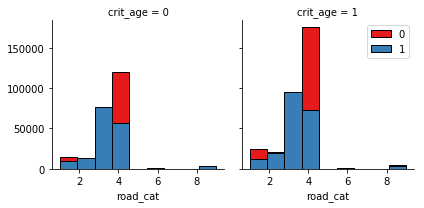

In [53]:
bins = np.linspace(df.atm.min(), df.atm.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist,'road_cat', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

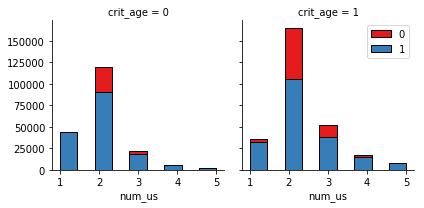

In [54]:
bins = np.linspace(df.lum.min(), df.lum.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'num_us', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

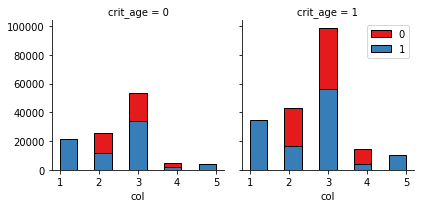

In [55]:
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'col', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

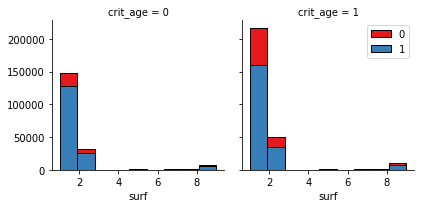

In [56]:
bins = np.linspace(df.surf.min(), df.surf.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'surf', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Text(0.5, 0, 'Severity')

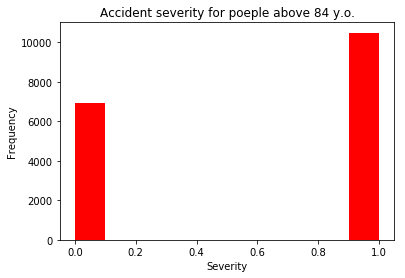

In [57]:
df['sev'][df['dead_age']==1].plot.hist(color='r')
# plt.xlabel('Hour of the day')
plt.title('Accident severity for poeple above 84 y.o.')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

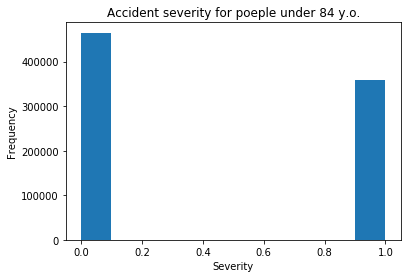

In [58]:
df['sev'][df['dead_age']==0].plot.hist()
plt.title('Accident severity for poeple under 84 y.o.')
plt.xlabel('Severity')

In [59]:
df.drop(['ID', 'date'], axis=1, inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# X = df.drop('sev', axis=1)
# X = StandardScaler().fit(X).transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('sev', axis=1), df['sev'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2) 


print('Size of training set:', xtrain.shape[0],'\n'
      'Size of test set:',xtest.shape[0],'\n'
      'Size of evaluation set:', xval.shape[0])

Size of training set: 537590 
Size of test set: 167997 
Size of evaluation set: 134398


In [61]:
#importing models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

In [62]:
t0=time.time()
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = tree.predict(xval)
score_tree = accuracy_score(yval,yhat)
print('Accuracy :',score_tree)

Time taken : 7.930682182312012
Accuracy : 0.636162740516972


In [63]:
#RF 1

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 89.59079623222351
Accuracy : 0.7196014821649132


In [64]:
importances = pd.DataFrame({'feature':df.drop('sev', axis=1).columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
dep,0.162
day,0.146
time,0.116
month,0.104
road_cat,0.054
col,0.046
num_us,0.045
agg,0.035
num_lanes,0.035


In [65]:
xtrain = pd.DataFrame(xtrain)
xtrain.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof','lum','atm'], axis=1, inplace=True)
xval.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)
xtest.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age','surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)

In [66]:
#RF 2:
#number of features reduced from 23 to 13

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 91.80351305007935
Accuracy : 0.7050402535752021


In [67]:
#RF 3:

#number of decision trees reduced from 100 to 50
#Limiting the number of features to look at when creating the next split to 5
#Limiting the max depth of the tree to 10


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=50, max_features=5, max_depth =10 ,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 38.83600664138794
Accuracy : 0.7143112248694177


In [68]:
#RF 4:

#number of decision trees reduced from 50 to 10
#Limiting the number of features to look at when creating the next split to 8
#Limiting the max depth of the tree to 12


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 12.069856643676758
Accuracy : 0.721684846500692


In [69]:
#Evaluation

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
t_rf = time.time()-t0
print('Time taken :' , t_rf)
yhat_rf = model_rf.predict(xtest)
jaccard_rf = jaccard_similarity_score(ytest,yhat_rf)
c_rf = classification_report(ytest,yhat_rf)
prec_rf = precision_score(ytest, yhat_rf)
rec_rf = recall_score(ytest, yhat_rf)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Time taken : 12.056262254714966
Jaccard : 0.7223998047584183 
               precision    recall  f1-score   support

           0       0.72      0.82      0.77     94297
           1       0.72      0.60      0.65     73700

   micro avg       0.72      0.72      0.72    167997
   macro avg       0.72      0.71      0.71    167997
weighted avg       0.72      0.72      0.72    167997



In [70]:
#Logistic Regression
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.65797854, 0.65801574, 0.65833569, 0.65956339, 0.65795622,
       0.65797854])

In [71]:
#Evaluation

t0=time.time()
lr = LogisticRegression(C=0.001, solver='liblinear').fit(xtrain, ytrain)
t_lr = time.time()-t0
print('Time taken :' , t_lr)
yhat = lr.predict(xtest)
jaccard_lr = jaccard_similarity_score(ytest,yhat)
c_lr = classification_report(ytest,yhat)
prec_lr = precision_score(ytest, yhat)
rec_lr = recall_score(ytest, yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 8.030706644058228
Jaccard : 0.6618272945350214 
               precision    recall  f1-score   support

           0       0.66      0.82      0.73     94297
           1       0.67      0.46      0.54     73700

   micro avg       0.66      0.66      0.66    167997
   macro avg       0.66      0.64      0.64    167997
weighted avg       0.66      0.66      0.65    167997



In [72]:
#KNN
tt = xtrain.shape[0]
tv = xval.shape[0]
xtrain[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(268795, 67199)

In [73]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain[int(tt*0.5):],ytrain[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 15 with an accuracy of 0.6515126713195137


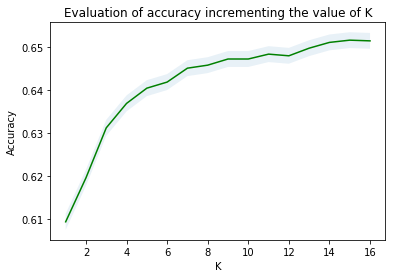

In [74]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [75]:
#Evaluation

t0=time.time()
model_knn = KNeighborsClassifier(n_neighbors = 16, n_jobs=-1)
model_knn.fit(xtrain,ytrain)
t_knn = time.time()-t0
print('Time taken :' , t_knn)
yhat = model_knn.predict(xtest)
jaccard_knn = jaccard_similarity_score(ytest,yhat)
c_knn = classification_report(ytest,yhat)
prec_knn = precision_score(ytest, yhat)
rec_knn = recall_score(ytest, yhat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Time taken : 570.1140332221985
Jaccard : 0.6647440132859516 
               precision    recall  f1-score   support

           0       0.67      0.79      0.73     94297
           1       0.65      0.51      0.57     73700

   micro avg       0.66      0.66      0.66    167997
   macro avg       0.66      0.65      0.65    167997
weighted avg       0.66      0.66      0.66    167997



In [76]:
#SVM
size = [1000,5000,10000,12000,15000,20000,30000,40000,50000,75000,100000]
acc = []
t = []
for s in size:
    t0=time.time()
    sv = SVC().fit(xtrain[:s],ytrain[:s])
    t.append(time.time()-t0)
    yhat = sv.predict(xval[:s])
    acc.append(jaccard_similarity_score(yval[:s],yhat))

In [77]:
performance = pd.DataFrame({'acc':acc, 'time':t}, index=size)
performance

,acc,time
1000,0.545000,0.230162
5000,0.579000,3.016156
10000,0.597200,9.582817
12000,0.606250,15.073714
15000,0.606400,59.730348
20000,0.618600,81.698540
30000,0.628533,163.586511
40000,0.636300,354.704556
50000,0.643780,698.807238
75000,0.657133,1170.111366


Text(0.5, 1.0, 'Time(s)')

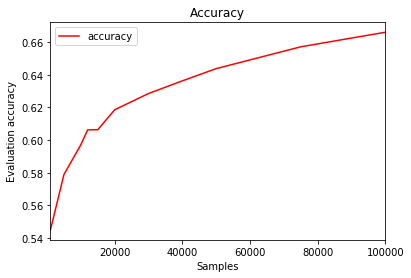

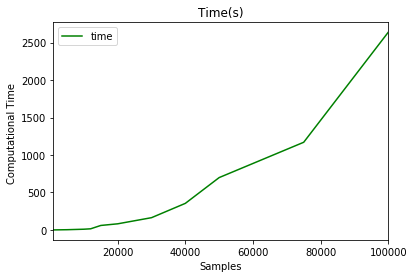

In [78]:
performance.plot(y='acc', color='r', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')
performance.plot(y='time', color='green', label='time')
plt.xlabel('Samples')
plt.ylabel('Computational Time ')
plt.title('Time(s)')

In [79]:
#Evaluation

s=75000
t0=time.time()
sv = SVC().fit(xtrain[:s],ytrain[:s])
t_svm = time.time()-t0
print('Time taken :' , t_svm)
yhat = sv.predict(xtest[:s])
jaccard_svm = jaccard_similarity_score(ytest[:s],yhat)
c_svm = classification_report(ytest[:s],yhat)
prec_svm = precision_score(ytest[:s], yhat)
rec_svm = recall_score(ytest[:s], yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 1147.2554037570953
Jaccard : 0.6618272945350214 
               precision    recall  f1-score   support

           0       0.66      0.82      0.73     94297
           1       0.67      0.46      0.54     73700

   micro avg       0.66      0.66      0.66    167997
   macro avg       0.66      0.64      0.64    167997
weighted avg       0.66      0.66      0.65    167997

